Installation

In [ ]:
# !pip install spacy
# !pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
###Execute below command through anaconda command prompt
!python -m spacy download en

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-04 10:22:23.030735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 10:22:23.895407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-04 10:22:25.356334: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import pandas
dataset=pd.read_csv("/content/ONE_PLUS_EARBUDS.txt", error_bad_lines = False)

<ipython-input-6-c20b03d7324b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset=pd.read_csv("/content/ONE_PLUS_EARBUDS.txt", error_bad_lines = False)


In [ ]:
dataset

,x
0,"first of all with mi 18 watt charger,it got fu..."
1,LONG BUT WORTH READING.Honest review after one...
2,Excellent product by one plus .....and best ea...
3,Great product Very much useful for us. It has ...
4,"Sound clarity is perfect,design built quality ..."
5,Awesome battery backup for 15 hour continuousl...
6,Amazing headset at such an awesome price. Inte...
7,I am writing this comment after one week of us...
8,The earphone ticks all the boxes. But what rea...
9,Ultimate beast in this range. The battery back...


In [ ]:
# clean-up of the dataset
dataset = [x.strip() for x in dataset.x] # remove both the leading and the trailing characters
dataset = [x for x in dataset if x] # removes empty strings, because they are considered in Python as False
dataset[0:10]

['first of all with mi 18 watt charger,it got full charged in 20mins.that was amazing and 16-18hrs playtime is best at this price range.I searched for a wireless earphone and bought many but finally settled with this.sound quality is good but build quality is premium.overall i would say it is the best earphone to go with and I guarantee you will not regret.drop like if you find it useful.',
 "LONG BUT WORTH READING.Honest review after one week. Just go for it. Dont get affected by negative reviews. Totally worth every penny and far ahead of its competition. The battery backup is splendid. Sound quality is very good nothing to complain here. Comfortable in the ears. Connectivity perfect. I haven't experienced any lag with normal media usage. I am a student and watch video lectures at sometimes 2x speed and never once I faced voice lag while changing video speed. Just go for it. Ju...",
 'Excellent product by one plus .....and best earphone from all brands in this range .......sound qual

In [ ]:
dataset

['first of all with mi 18 watt charger,it got full charged in 20mins.that was amazing and 16-18hrs playtime is best at this price range.I searched for a wireless earphone and bought many but finally settled with this.sound quality is good but build quality is premium.overall i would say it is the best earphone to go with and I guarantee you will not regret.drop like if you find it useful.',
 "LONG BUT WORTH READING.Honest review after one week. Just go for it. Dont get affected by negative reviews. Totally worth every penny and far ahead of its competition. The battery backup is splendid. Sound quality is very good nothing to complain here. Comfortable in the ears. Connectivity perfect. I haven't experienced any lag with normal media usage. I am a student and watch video lectures at sometimes 2x speed and never once I faced voice lag while changing video speed. Just go for it. Ju...",
 'Excellent product by one plus .....and best earphone from all brands in this range .......sound qual

In [ ]:
# Joining the list into one string/text
text = ' '.join(dataset)
text

"first of all with mi 18 watt charger,it got full charged in 20mins.that was amazing and 16-18hrs playtime is best at this price range.I searched for a wireless earphone and bought many but finally settled with this.sound quality is good but build quality is premium.overall i would say it is the best earphone to go with and I guarantee you will not regret.drop like if you find it useful. LONG BUT WORTH READING.Honest review after one week. Just go for it. Dont get affected by negative reviews. Totally worth every penny and far ahead of its competition. The battery backup is splendid. Sound quality is very good nothing to complain here. Comfortable in the ears. Connectivity perfect. I haven't experienced any lag with normal media usage. I am a student and watch video lectures at sometimes 2x speed and never once I faced voice lag while changing video speed. Just go for it. Ju... Excellent product by one plus .....and best earphone from all brands in this range .......sound quality is aw

In [ ]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'first of all with mi 18 watt chargerit got full charged in 20minsthat was amazing and 1618hrs playtime is best at this price rangeI searched for a wireless earphone and bought many but finally settled with thissound quality is good but build quality is premiumoverall i would say it is the best earphone to go with and I guarantee you will not regretdrop like if you find it useful LONG BUT WORTH READINGHonest review after one week Just go for it Dont get affected by negative reviews Totally worth every penny and far ahead of its competition The battery backup is splendid Sound quality is very good nothing to complain here Comfortable in the ears Connectivity perfect I havent experienced any lag with normal media usage I am a student and watch video lectures at sometimes 2x speed and never once I faced voice lag while changing video speed Just go for it Ju Excellent product by one plus and best earphone from all brands in this range sound quality is awesome  bass is good not averagebest 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['first', 'of', 'all', 'with', 'mi', '18', 'watt', 'chargerit', 'got', 'full', 'charged', 'in', '20minsthat', 'was', 'amazing', 'and', '1618hrs', 'playtime', 'is', 'best', 'at', 'this', 'price', 'rangeI', 'searched', 'for', 'a', 'wireless', 'earphone', 'and', 'bought', 'many', 'but', 'finally', 'settled', 'with', 'thissound', 'quality', 'is', 'good', 'but', 'build', 'quality', 'is', 'premiumoverall', 'i', 'would', 'say', 'it', 'is']


In [ ]:
len(text_tokens)

554

In [ ]:
#Remove stopwords
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['first', 'mi', '18', 'watt', 'chargerit', 'got', 'full', 'charged', '20minsthat', 'amazing', '1618hrs', 'playtime', 'best', 'price', 'rangeI', 'searched', 'wireless', 'earphone', 'bought', 'many', 'finally', 'settled', 'thissound', 'quality', 'good', 'build', 'quality', 'premiumoverall', 'would', 'say', 'best', 'earphone', 'go', 'I', 'guarantee', 'regretdrop', 'like', 'find', 'useful', 'LONG']


In [ ]:
#Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['first', 'mi', '18', 'watt', 'chargerit', 'got', 'full', 'charged', '20minsthat', 'amazing', '1618hrs', 'playtime', 'best', 'price', 'rangei', 'searched', 'wireless', 'earphone', 'bought', 'many', 'finally', 'settled', 'thissound', 'quality', 'good']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:45])

['first', 'mi', '18', 'watt', 'chargerit', 'got', 'full', 'charg', '20minsthat', 'amaz', '1618hr', 'playtim', 'best', 'price', 'rangei', 'search', 'wireless', 'earphon', 'bought', 'mani', 'final', 'settl', 'thissound', 'qualiti', 'good', 'build', 'qualiti', 'premiumoveral', 'would', 'say', 'best', 'earphon', 'go', 'i', 'guarante', 'regretdrop', 'like', 'find', 'use', 'long', 'but', 'worth', 'readinghonest', 'review', 'one']


In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:56])

first mi 18 watt chargerit got full charged 20minsthat amazing 1618hrs playtime best price rangeI searched wireless earphone bought many finally settled thissound quality good build quality premiumoverall would say best earphone go I guarantee regretdrop like find useful LONG BUT WORTH READINGHonest review one week Just go Dont get affected negative reviews Totally worth


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:20])

['first', 'mi', '18', 'watt', 'chargerit', 'get', 'full', 'charge', '20minsthat', 'amazing', '1618hrs', 'playtime', 'good', 'price', 'rangei', 'search', 'wireless', 'earphone', 'buy', 'many']


# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
œðÿ,215
ðÿ,214
xiaomiand,213
write,212
would,211
worth,210
within,209
wireless,208
whole,207
who,206


In [ ]:
print(vectorizer.vocabulary_)

{'first': 88, 'mi': 122, '18': 3, 'watt': 202, 'chargerit': 42, 'get': 93, 'full': 91, 'charge': 40, '20minsthat': 5, 'amazing': 16, '1618hrs': 2, 'playtime': 143, 'good': 95, 'price': 147, 'rangei': 155, 'search': 167, 'wireless': 208, 'earphone': 73, 'buy': 37, 'many': 119, 'finally': 86, 'settle': 170, 'thissound': 187, 'quality': 153, 'build': 35, 'premiumoverall': 146, 'would': 211, 'say': 166, 'go': 94, 'guarantee': 99, 'regretdrop': 163, 'like': 113, 'find': 87, 'useful': 195, 'long': 115, 'but': 36, 'worth': 210, 'readinghonest': 157, 'review': 164, 'one': 135, 'week': 204, 'just': 108, 'do': 70, 'not': 130, 'affect': 12, 'negative': 126, 'totally': 191, 'every': 76, 'penny': 140, 'far': 83, 'ahead': 13, 'competition': 49, 'the': 185, 'battery': 27, 'backup': 23, 'splendid': 178, 'sound': 174, 'nothing': 133, 'complain': 51, 'comfortable': 47, 'ear': 72, 'connectivity': 55, 'perfect': 141, 'have': 100, 'experience': 81, 'lag': 111, 'normal': 129, 'media': 121, 'usage': 193, 'st

In [ ]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['competitor' 'complain' 'completely' 'connect' 'connection'
 'connectivity' 'connects' 'continuously' 'continuouslybuild' 'convert'
 'correct' 'could' 'currency' 'day' 'dayand' 'delay' 'delayif' 'design'
 'device' 'discernible' 'do' 'dollar' 'ear' 'earphone' 'easily' 'elegant'
 'every' 'everyperson' 'excellent' 'exchange' 'expensive' 'experience'
 'face' 'far' 'fast' 'feel' 'finally' 'find' 'first' 'fitting' 'for'
 'full' 'gaminggo' 'get' 'go' 'good' 'goodmost' 'great' 'greatand'
 'guarantee']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.toarray().shape)

(375, 216)


In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(dataset)

In [ ]:
bow_matrix_ngram

<10x100 sparse matrix of type '<class 'numpy.int64'>'
	with 303 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['all' 'all the' 'also' 'and' 'are' 'are top' 'are top notch' 'at'
 'awesome' 'awesome bass' 'awesome bass is' 'back' 'back up' 'back up is'
 'backup' 'backup is' 'bass' 'bass is' 'bass is bit' 'battery'
 'battery back' 'battery back up' 'battery backup' 'battery backup is'
 'best' 'best earphone' 'bit' 'but' 'by' 'can' 'charger' 'clarity' 'clear'
 'could' 'delay' 'design' 'earphone' 'face' 'for' 'for it' 'get' 'go'
 'go for' 'go for it' 'good' 'have' 'have oneplus' 'hour' 'if' 'if you'
 'in' 'is' 'is awesome' 'is good' 'it' 'its' 'like' 'more' 'not' 'notch'
 'of' 'one' 'one week' 'oneplus' 'price' 'pro' 'product' 'quality'
 'quality is' 'quality is awesome' 'quality is good' 'range' 'secs'
 'sound' 'sound delay' 'sound quality' 'sound quality is' 'speed' 'takes'
 'than' 'that' 'the' 'the best' 'this' 'this range' 'to' 'top' 'top notch'
 'up' 'up is' 'use' 'useful' 'very' 'which' 'with' 'worth' 'you' 'ðÿ'
 'ðÿ ðÿ' 'ðÿ ðÿ ðÿ']
[[1 0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 2 0 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(dataset)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['and' 'for' 'good' 'in' 'is' 'it' 'quality' 'quality is' 'sound' 'the']
[[0.529362   0.19648429 0.15951863 0.15951863 0.4813338  0.43454563
  0.26381723 0.31903726 0.13190861 0.14484854]
 [0.60265532 0.44737742 0.18160493 0.18160493 0.27398867 0.32980738
  0.15017215 0.18160493 0.15017215 0.32980738]
 [0.33796527 0.         0.30552868 0.30552868 0.69142996 0.
  0.25264676 0.30552868 0.25264676 0.        ]
 [0.         0.59601015 0.         0.24193976 0.         0.43937967
  0.40012803 0.         0.20006402 0.43937967]
 [0.         0.         0.51136181 0.         0.77149522 0.23216728
  0.2114268  0.         0.2114268  0.        ]
 [0.26408799 0.58813223 0.         0.23874185 0.36019154 0.21678603
  0.29612942 0.35811278 0.29612942 0.21678603]
 [0.         0.         0.         0.         0.7486325  0.30038289
  0.27354842 0.3308053  0.27354842 0.30038289]
 [0.         0.         0.79832862 0.         0.60222206 0.
  0.         0.         0.         0.        ]
 [0.         0.        

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

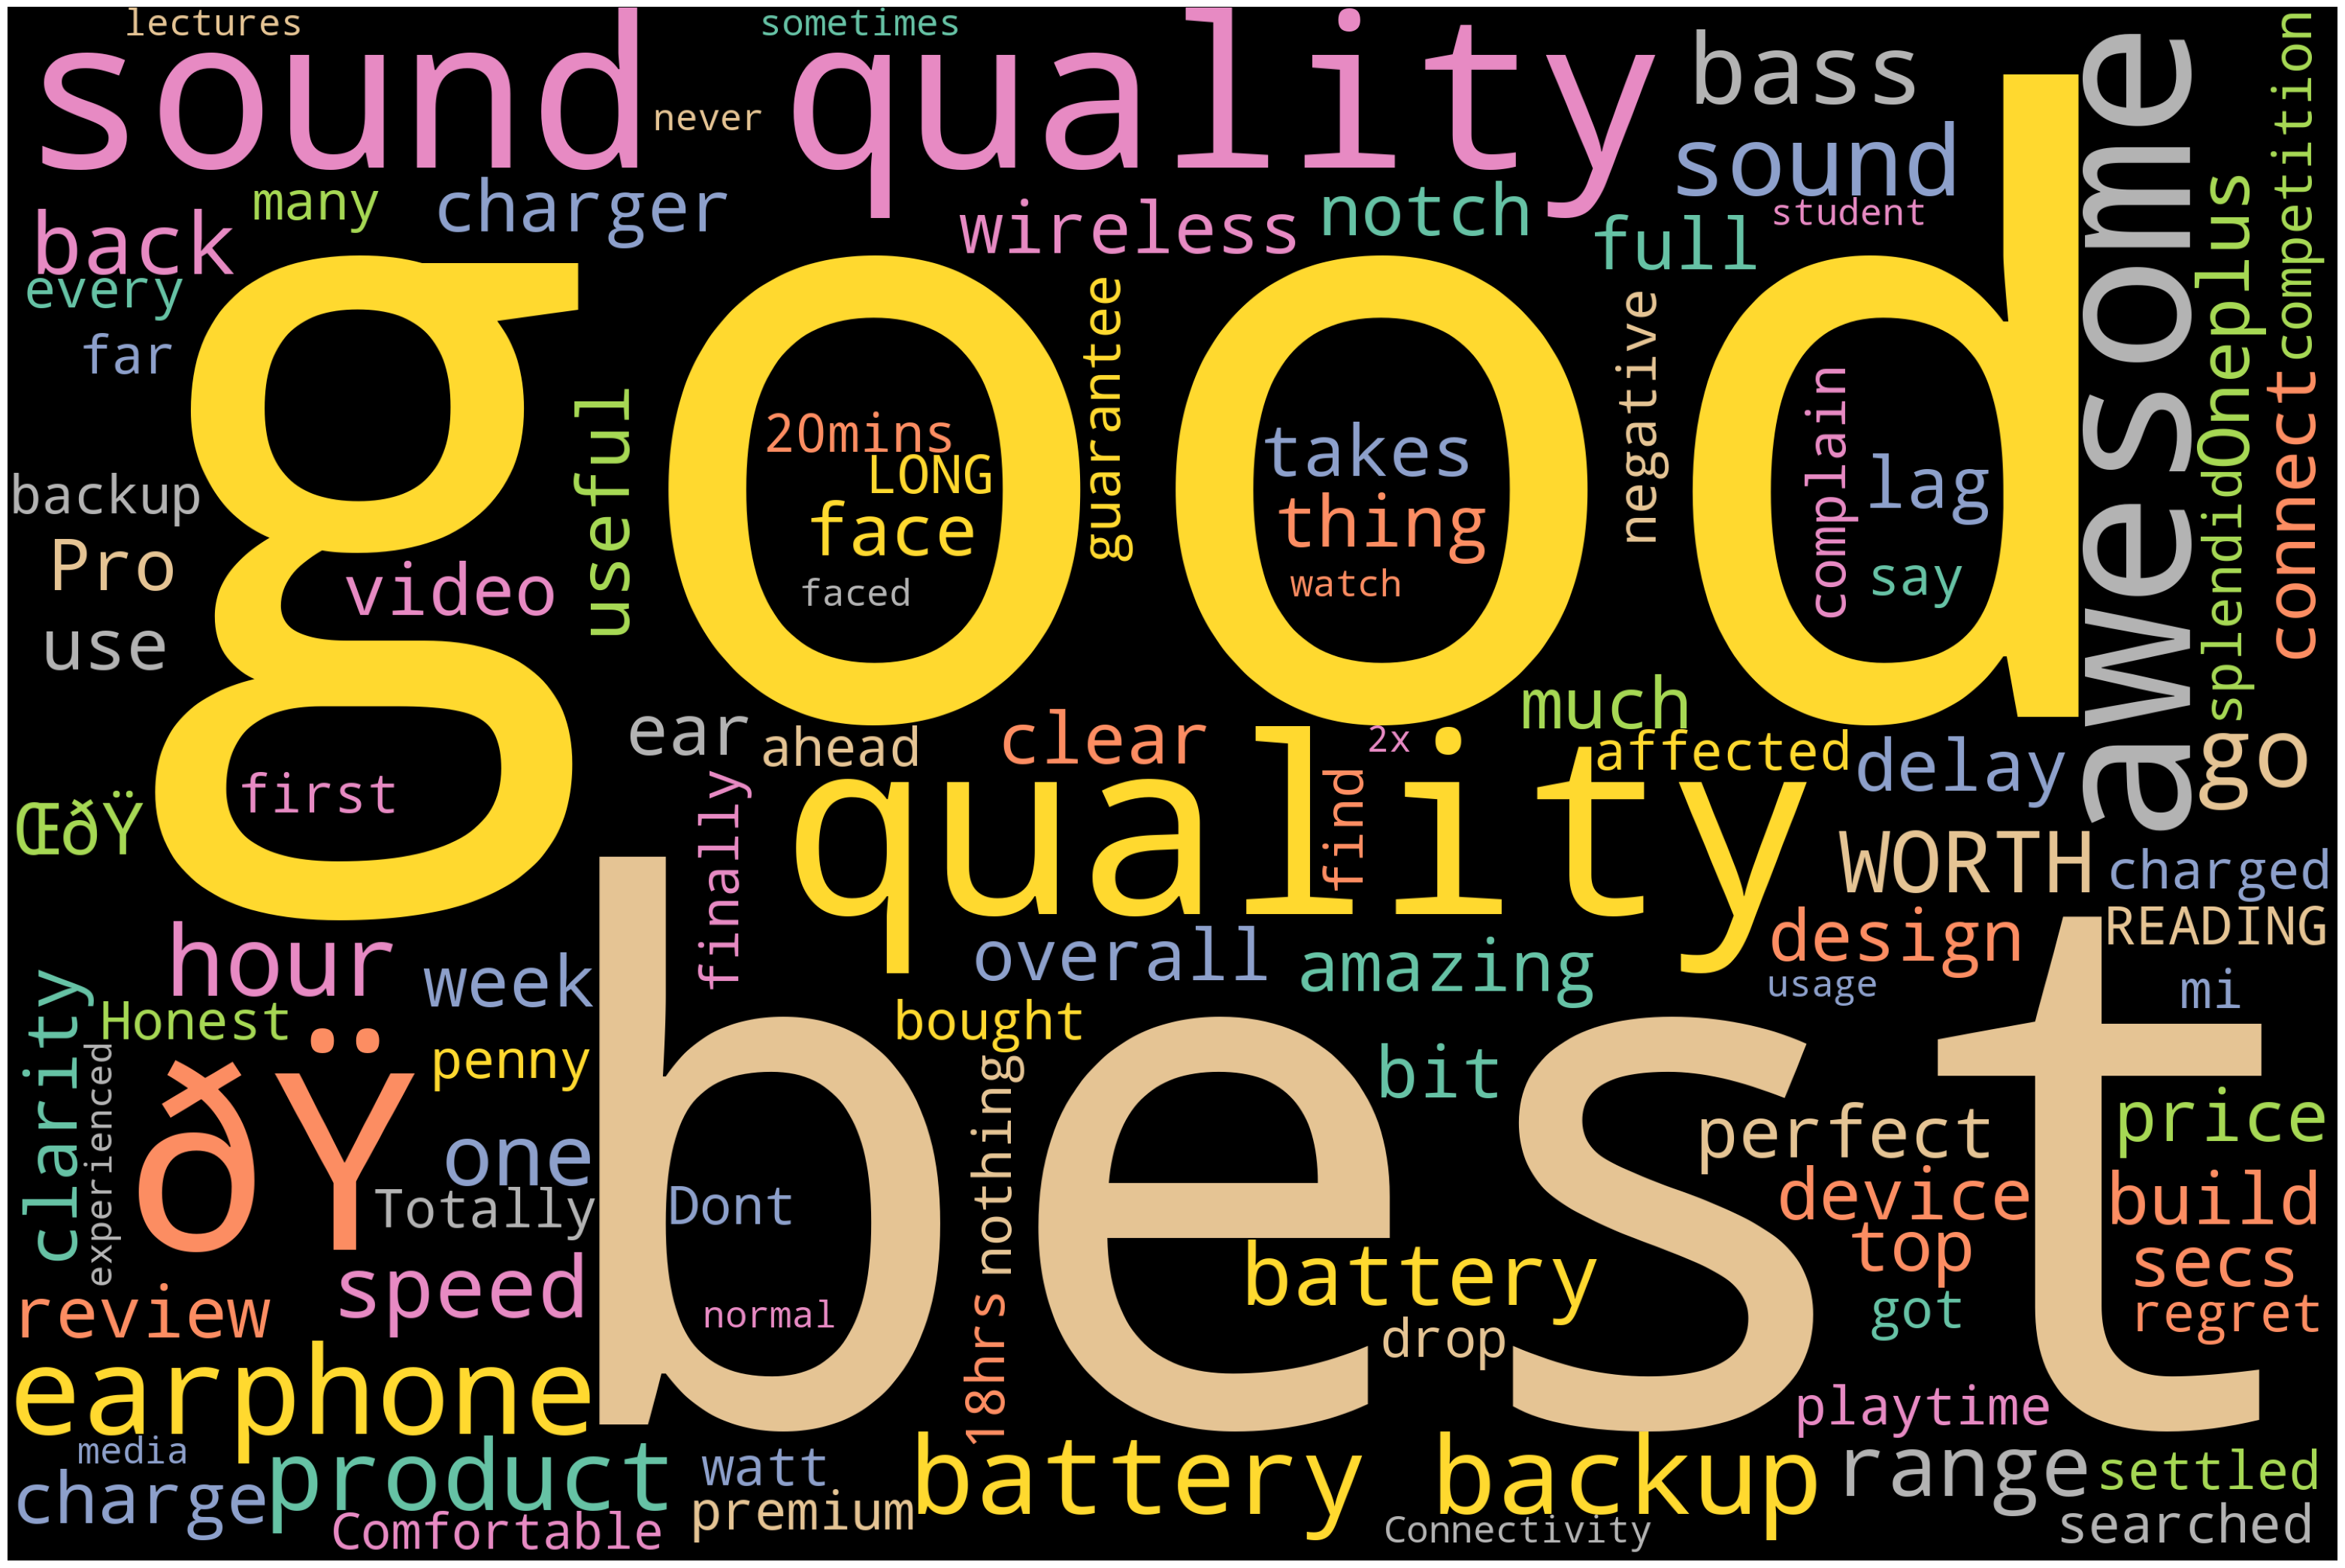

In [ ]:
#  Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('beast')
stopwords.add('Flipkart')
stopwords.add('earbuds')

wordcloud = WordCloud(width = 3000, height = 2000, 
                      background_color='black', max_words=100,
                      colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

Sentimental Analysis

In [33]:
#Sentiment analysis
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
dataset =pd.read_csv("/content/ONE_PLUS_EARBUDS.txt",error_bad_lines=False)
dataset = [x.strip() for x in dataset.x] # remove both the leading and the trailing characters
dataset= [x for x in dataset if x] # removes empty strings, because they are considered in Python as False

<ipython-input-36-cd6793bc1ea4>:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset =pd.read_csv("/content/ONE_PLUS_EARBUDS.txt",error_bad_lines=False)


In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(dataset))
sentences[5:15]

['The battery backup is splendid.',
 'Sound quality is very good nothing to complain here.',
 'Comfortable in the ears.',
 'Connectivity perfect.',
 "I haven't experienced any lag with normal media usage.",
 'I am a student and watch video lectures at sometimes 2x speed and never once I faced voice lag while changing video speed.',
 'Just go for it.',
 'Ju...',
 'Excellent product by one plus .....and best earphone from all brands in this range .......sound quality is awesome....  ...bass is good .....not average......best things this earphone is battery backup .....I get 2 day batter.....approx 19 hour backup ...... Great product Very much useful for us.',
 'It has all the best... Like sound quality, battery back up, buid quality, fitting in the ðŸ‘‚..']

In [40]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"first of all with mi 18 watt charger,it got fu..."
1,LONG BUT WORTH READING.Honest review after one...
2,Just go for it.
3,Dont get affected by negative reviews.
4,Totally worth every penny and far ahead of its...
5,The battery backup is splendid.
6,Sound quality is very good nothing to complain...
7,Comfortable in the ears.
8,Connectivity perfect.
9,I haven't experienced any lag with normal medi...


In [41]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [42]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [43]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [44]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

first of all with mi 18 watt charger,it got full charged in 20mins.that was amazing and 16-18hrs playtime is best at this price range.I searched for a wireless earphone and bought many but finally settled with this.sound quality is good but build quality is premium.overall i would say it is the best earphone to go with and I guarantee you will not regret.drop like if you find it useful.
LONG BUT WORTH READING.Honest review after one week.
Just go for it.
Dont get affected by negative reviews.
Totally worth every penny and far ahead of its competition.
The battery backup is splendid.
Sound quality is very good nothing to complain here.
Comfortable in the ears.
Connectivity perfect.
I haven't experienced any lag with normal media usage.
I am a student and watch video lectures at sometimes 2x speed and never once I faced voice lag while changing video speed.
Just go for it.
Ju...
Excellent product by one plus .....and best earphone from all brands in this range .......sound quality is awe

In [45]:
sent_df

,sentence,sentiment_value
0,"first of all with mi 18 watt charger,it got fu...",18
1,LONG BUT WORTH READING.Honest review after one...,2
2,Just go for it.,0
3,Dont get affected by negative reviews.,-2
4,Totally worth every penny and far ahead of its...,2
5,The battery backup is splendid.,3
6,Sound quality is very good nothing to complain...,1
7,Comfortable in the ears.,2
8,Connectivity perfect.,3
9,I haven't experienced any lag with normal medi...,-1


In [46]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    69
1     8
2     4
3     6
4    10
5     5
6     9
7     4
8     2
9     9
Name: word_count, dtype: int64

In [47]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
5,The battery backup is splendid.,3,5
32,Connection quality is good.,3,4
24,But what really sets it apart is its surprisin...,5,18
21,I am writing this comment after one week of us...,6,23
14,"It has all the best... Like sound quality, bat...",6,17
16,Amazing headset at such an awesome price.,8,7
18,Sound Quality is Awesome.Bass is a bit lacking...,8,11
0,"first of all with mi 18 watt charger,it got fu...",18,69
13,Excellent product by one plus .....and best ea...,21,45
15,I recommend it for buy everyperson who's like ...,28,121


In [48]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    36.000000
mean      3.333333
std       6.440940
min      -2.000000
25%       0.000000
50%       1.500000
75%       3.000000
max      28.000000
Name: sentiment_value, dtype: float64

In [52]:
sent_df[sent_df['sentiment_value']<-1].head()['sentence'].tolist()[0]

'Dont get affected by negative reviews.'

In [53]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-54-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

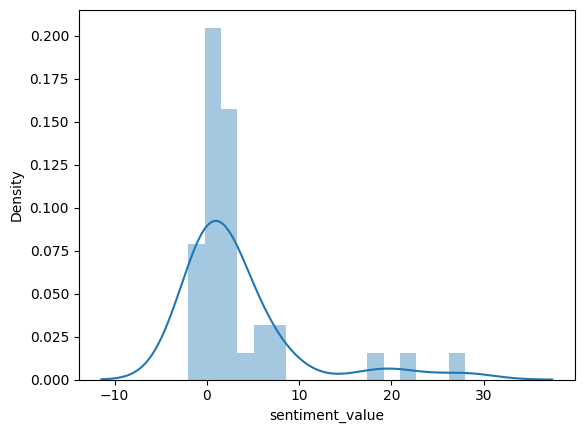

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

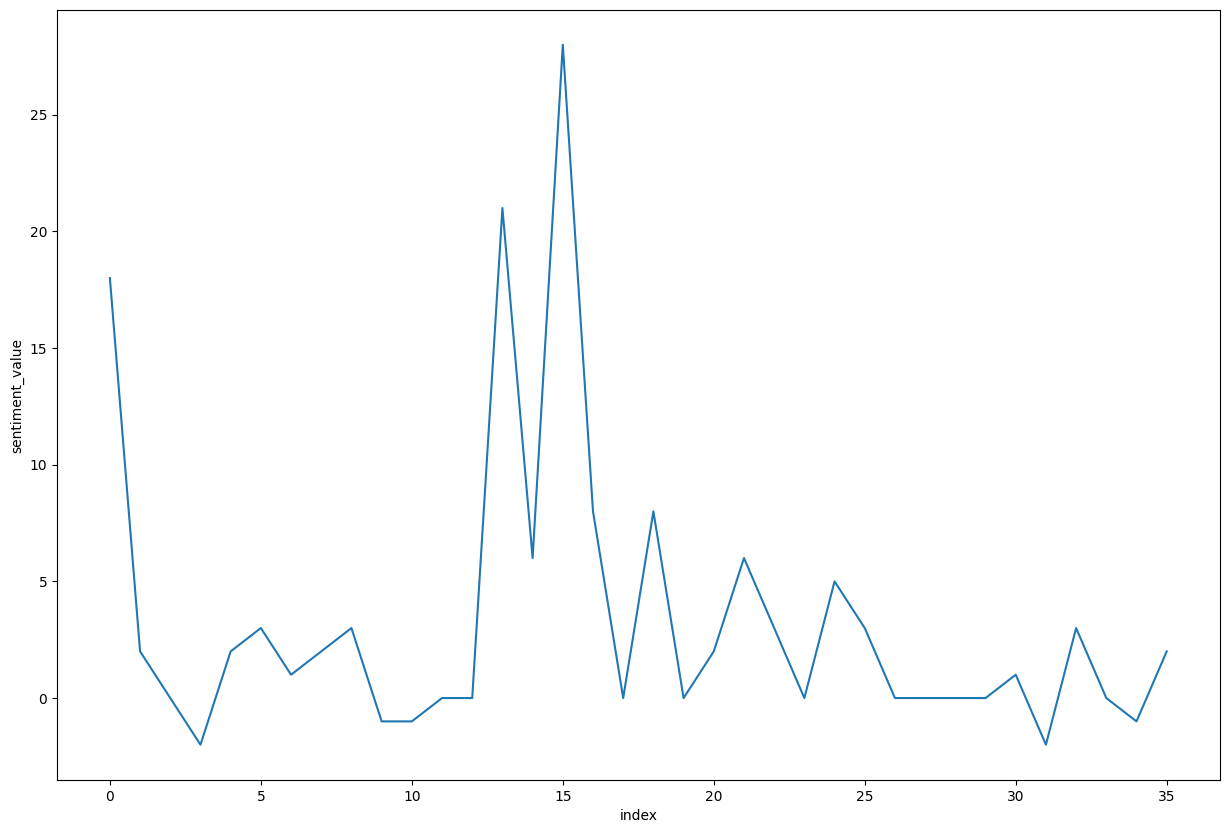

In [55]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

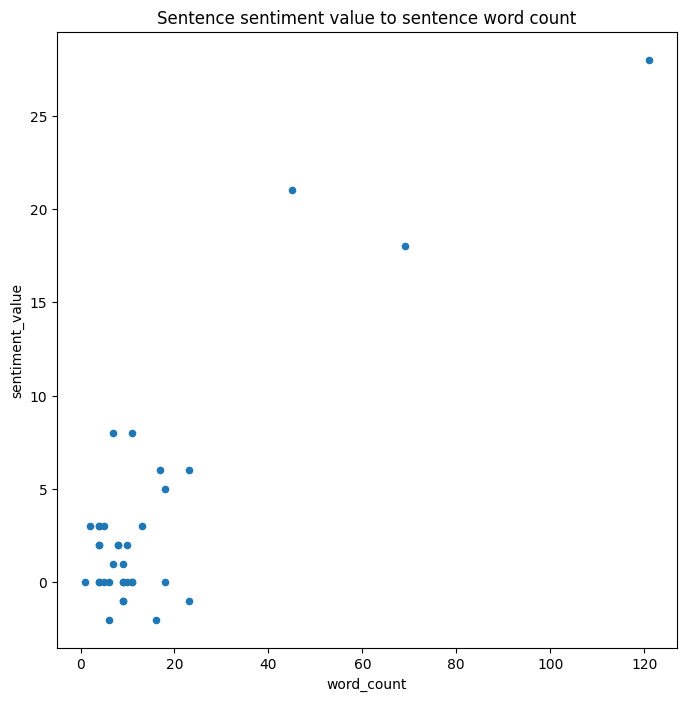

In [56]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')